In [1]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

# Connect to Postgres
conn = psycopg2.connect("host=127.0.0.1 dbname=studentdb user=student password=student")
conn.set_session(autocommit=True)
cur = conn.cursor()

#### Question 1: What are the busiest times to visit Seattle ? 

My answer to this question is based on calendar data from the year 2016.

In [2]:
# Query for Question 1
cur.execute('select substring(date,1,7) as month,count(*) as count '
            'from calendar where available=\'f\' '
            'and substring(date,1,4)=\'2016\' '
            'group by substring(date,1,7)')

rows = cur.fetchall()

months = []
values = []
for row in rows:
    print('{} {}'.format(row[0][5:7],row[1]))
    months.append(row[0][5:7])
    values.append(row[1])



01 5423
02 4394
03 4027
04 4331
05 4397
06 4154
07 4903
08 4505
09 3962
10 3808
11 3283
12 3161


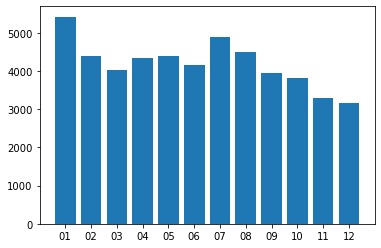

In [3]:
plt.bar(months, values)
plt.show()

#### Question 2 : What are the favorite neighbourhoods ?

In [4]:
# Query for Question 2
cur.execute('select l.neighbourhood as neighbourhood, count(*) as count '
            'from listings l, calendar c '
            'where c.listing_id=l.id '
            'and c.available=\'f\' '
            'and substring(c.date,1,4)=\'2016\' '  
            'group by l.neighbourhood '
            'order by count desc limit 5')

rows = cur.fetchall()

neighbourhoods = []
values = []
for row in rows:
    print('{} {}'.format(row[0],row[1]))
    neighbourhoods.append(row[0])
    values.append(row[1])

Queen Anne 22746
Wallingford 15797
Ballard 15307
Lower Queen Anne 958
Green Lake 892


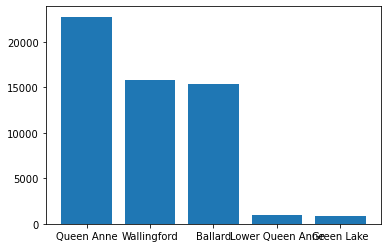

In [5]:
plt.bar(neighbourhoods, values)
plt.show()

#### Question 3 : By how much can prices spike ? 

In [6]:
# Query for Question 3
cur.execute('select substring(date,1,7) as month, max(replace(price,\'$\',\'\')) as price '
            'from calendar where available=\'t\' and substring(date,1,4)=\'2016\' '
            'group by substring(date,1,7)')

rows = cur.fetchall()

months = []
values = []
for row in rows:
    print('{} {}'.format(row[0][5:7],row[1]))
    months.append(row[0][5:7])
    values.append(int(float(row[1])))

01 999.00
02 999.00
03 99.00
04 99.00
05 99.00
06 99.00
07 99.00
08 99.00
09 999.00
10 999.00
11 999.00
12 999.00


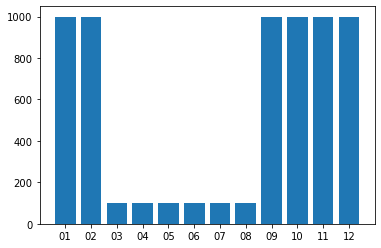

In [7]:
plt.bar(months, values)
plt.show()